In [1]:
### import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# read the excel file
df = pd.read_excel("default of credit card clients.xls")
# fix the top rows to be more concise
df = df.iloc[1:,:]
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
# reset the index of the df 
df = df.reset_index(drop=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# export raw data to csv to run through Logistic Regression, Decision Tree and Naive Bayes
df.to_csv('comp2_raw.csv')

### General Info on Data ###

In [5]:
# exmamining the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
X1     30000 non-null object
X2     30000 non-null object
X3     30000 non-null object
X4     30000 non-null object
X5     30000 non-null object
X6     30000 non-null object
X7     30000 non-null object
X8     30000 non-null object
X9     30000 non-null object
X10    30000 non-null object
X11    30000 non-null object
X12    30000 non-null object
X13    30000 non-null object
X14    30000 non-null object
X15    30000 non-null object
X16    30000 non-null object
X17    30000 non-null object
X18    30000 non-null object
X19    30000 non-null object
X20    30000 non-null object
X21    30000 non-null object
X22    30000 non-null object
X23    30000 non-null object
Y      30000 non-null object
dtypes: object(24)
memory usage: 5.5+ MB


In [6]:
# examine columns and shape of df
df.columns, df.shape

(Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
        'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
        'X22', 'X23', 'Y'],
       dtype='object'), (30000, 24))

In [7]:
# loooking for missing values - No missing values! 
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Checking the Balance of the Target ###

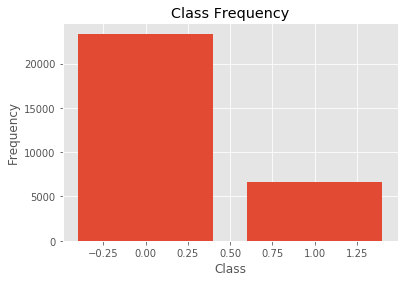

In [8]:
# code from Dr. Tao's 'Handling Imbalanced Data' week 6 notebook 
# will need to handle either in preprocessing or right before modeling 
classes = df['Y'].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**Target is very imbalanced. Must address this in preprocessing steps or right before modeling**

In [9]:
# separate out the target variable Y and save to its own csv file
dfy = pd.DataFrame(df['Y'])
dfy.to_csv('comp2_y.csv')

# drop Y from the main dataframe
df = df.drop('Y', axis=1)

### Binning X5 (Age) ###

In [10]:
# use pd.cut to help determine bins 
pd.cut(df['X5'], 3)

0        (20.942, 40.333]
1        (20.942, 40.333]
2        (20.942, 40.333]
3        (20.942, 40.333]
4        (40.333, 59.667]
5        (20.942, 40.333]
6        (20.942, 40.333]
7        (20.942, 40.333]
8        (20.942, 40.333]
9        (20.942, 40.333]
10       (20.942, 40.333]
11       (40.333, 59.667]
12       (40.333, 59.667]
13       (20.942, 40.333]
14       (20.942, 40.333]
15       (20.942, 40.333]
16       (20.942, 40.333]
17       (40.333, 59.667]
18       (40.333, 59.667]
19       (20.942, 40.333]
20       (20.942, 40.333]
21       (20.942, 40.333]
22       (20.942, 40.333]
23       (20.942, 40.333]
24       (20.942, 40.333]
25       (20.942, 40.333]
26       (20.942, 40.333]
27       (20.942, 40.333]
28       (40.333, 59.667]
29       (20.942, 40.333]
               ...       
29970    (20.942, 40.333]
29971    (20.942, 40.333]
29972    (20.942, 40.333]
29973    (20.942, 40.333]
29974    (20.942, 40.333]
29975    (40.333, 59.667]
29976    (40.333, 59.667]
29977    (20

In [11]:
# Binning X5 (Age) with adjusted pd.cut bins 

def assign_age_bins(X5):
    if int(X5) >= 20 and int(X5) <= 33:  # Returning '1' if age is between 20 and 33
        return(1)
    if int(X5) >= 33 and int(X5) <= 44:  # Returing '2' if age is between 33 and 44
        return(2)
    else:                                # Returning '3' if age is greater than 44
        return(3)                  

#Creating Age_Bins column in the DataFrame
df['X5_Age_Bins'] = df['X5'].apply(assign_age_bins)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X5_Age_Bins
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,2
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,2
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,3


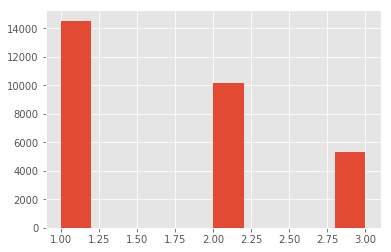

In [12]:
# exmaining Age_Bins column
df['X5_Age_Bins'].hist()
plt.show()

### Binning X6-X11 ###

In [13]:
# examine variables 
# df['X6'].hist(), df['X6'].describe()

In [14]:
# define the function that creates 2 bins for variables X6-X11
def assign_payment_bins(col):
    if int(col) == (-1):  # Returning '1' if payment made on time ("pay duly")
        return(1)
    else:                 # Returning '2' if payment not made on time (any delayed payment)
        return(2)                  

#Creating Payment_Bins columns in the DataFrame
df['X6_Payment_Bins'] = df['X6'].apply(assign_payment_bins)
df['X7_Payment_Bins'] = df['X7'].apply(assign_payment_bins)
df['X8_Payment_Bins'] = df['X8'].apply(assign_payment_bins)
df['X9_Payment_Bins'] = df['X9'].apply(assign_payment_bins)
df['X10_Payment_Bins'] = df['X10'].apply(assign_payment_bins)
df['X11_Payment_Bins'] = df['X11'].apply(assign_payment_bins)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X21,X22,X23,X5_Age_Bins,X6_Payment_Bins,X7_Payment_Bins,X8_Payment_Bins,X9_Payment_Bins,X10_Payment_Bins,X11_Payment_Bins
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,2,2,1,1,2,2
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,1,2,2,2,2,2
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,2,2,2,2,2,2,2
3,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,2,2,2,2,2,2,2
4,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,3,1,2,1,2,2,2


### Binning X12-X17
**3 new variables will be created for these features**
- The first will be the absolute value of the original payment amount
- The second will address the positivity or negativity of the original payment amount
- The third will address the time series nature of these features and will be the monthly difference from when the data was collected to the time when the payment was made

In [15]:
# new feature first new feature

df['X12_abs'] = abs(df['X12'])
df['X13_abs'] = abs(df['X13'])
df['X14_abs'] = abs(df['X14'])
df['X15_abs'] = abs(df['X15'])
df['X16_abs'] = abs(df['X16'])
df['X17_abs'] = abs(df['X17'])
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X8_Payment_Bins,X9_Payment_Bins,X10_Payment_Bins,X11_Payment_Bins,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs
0,20000,2,2,1,24,2,2,-1,-1,-2,...,1,1,2,2,3913,3102,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2,2,2,2,2682,1725,2682,3272,3455,3261
2,90000,2,2,2,34,0,0,0,0,0,...,2,2,2,2,29239,14027,13559,14331,14948,15549
3,50000,2,2,1,37,0,0,0,0,0,...,2,2,2,2,46990,48233,49291,28314,28959,29547
4,50000,1,2,1,57,-1,0,-1,0,0,...,1,2,2,2,8617,5670,35835,20940,19146,19131


In [16]:
# creating the second new feature

df['X12_sign'] = np.where(df['X12'] > 0, 1,0)
df['X13_sign'] = np.where(df['X13'] > 0, 1,0)
df['X14_sign'] = np.where(df['X14'] > 0, 1,0)
df['X15_sign'] = np.where(df['X15'] > 0, 1,0)
df['X16_sign'] = np.where(df['X16'] > 0, 1,0)
df['X17_sign'] = np.where(df['X17'] > 0, 1,0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14_abs,X15_abs,X16_abs,X17_abs,X12_sign,X13_sign,X14_sign,X15_sign,X16_sign,X17_sign
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,1,1,1,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,1,1,1,1,1,1
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1,1,1,1,1,1
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,1,1,1,1,1,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,1,1,1,1,1,1


In [17]:
# creating the third variable 
# need to make sure that there are actually no -1 in these columns

df['X12_monthlydif'] = np.where(df['X12'] > -1 , 6,6)
df['X13_monthlydif'] = np.where(df['X13'] > -1 , 5,5)
df['X14_monthlydif'] = np.where(df['X14'] > -1 , 4,4)
df['X15_monthlydif'] = np.where(df['X15'] > -1 , 3,3)
df['X16_monthlydif'] = np.where(df['X16'] > -1 , 2,2)
df['X17_monthlydif'] = np.where(df['X17'] > -1 , 1,1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14_sign,X15_sign,X16_sign,X17_sign,X12_monthlydif,X13_monthlydif,X14_monthlydif,X15_monthlydif,X16_monthlydif,X17_monthlydif
0,20000,2,2,1,24,2,2,-1,-1,-2,...,1,0,0,0,6,5,4,3,2,1
1,120000,2,2,2,26,-1,2,0,0,0,...,1,1,1,1,6,5,4,3,2,1
2,90000,2,2,2,34,0,0,0,0,0,...,1,1,1,1,6,5,4,3,2,1
3,50000,2,2,1,37,0,0,0,0,0,...,1,1,1,1,6,5,4,3,2,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,1,1,1,1,6,5,4,3,2,1


### Binning X18-X23

In [18]:
# making features X18 to X23 binary
df['X18_binary'] = np.where(df['X18']==0,0,1)
df['X19_binary'] = np.where(df['X19']==0,0,1)
df['X20_binary'] = np.where(df['X20']==0,0,1)
df['X21_binary'] = np.where(df['X21']==0,0,1)
df['X22_binary'] = np.where(df['X22']==0,0,1)
df['X23_binary'] = np.where(df['X23']==0,0,1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14_monthlydif,X15_monthlydif,X16_monthlydif,X17_monthlydif,X18_binary,X19_binary,X20_binary,X21_binary,X22_binary,X23_binary
0,20000,2,2,1,24,2,2,-1,-1,-2,...,4,3,2,1,0,1,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,4,3,2,1,0,1,1,1,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,4,3,2,1,1,1,1,1,1,1
3,50000,2,2,1,37,0,0,0,0,0,...,4,3,2,1,1,1,1,1,1,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,4,3,2,1,1,1,1,1,1,1


### Cleaning Up the DataFrame ###

In [19]:
# filter out the categorical variables in the dataframe
# these variables do not need to be altered 
df_cat = df.filter(['X2','X3','X4','X5_Age_Bins','X6_Payment_Bins','X7_Payment_Bins',
                  'X8_Payment_Bins','X9_Payment_Bins','X10_Payment_Bins','X11_Payment_Bins',
                   'X12_sign','X12_monthlydif','X13_sign','X13_monthlydif','X14_sign','X14_monthlydif',
                   'X15_sign','X15_monthlydif','X16_sign','X16_monthlydif','X17_sign','X17_monthlydif',
                   'X18_binary','X19_binary','X20_binary','X21_binary','X22_binary','X23_binary'],axis=1)
df_cat.head()

,X2,X3,X4,X5_Age_Bins,X6_Payment_Bins,X7_Payment_Bins,X8_Payment_Bins,X9_Payment_Bins,X10_Payment_Bins,X11_Payment_Bins,...,X16_sign,X16_monthlydif,X17_sign,X17_monthlydif,X18_binary,X19_binary,X20_binary,X21_binary,X22_binary,X23_binary
0,2,2,1,1,2,2,1,1,2,2,...,0,2,0,1,0,1,0,0,0,0
1,2,2,2,1,1,2,2,2,2,2,...,1,2,1,1,0,1,1,1,0,1
2,2,2,2,2,2,2,2,2,2,2,...,1,2,1,1,1,1,1,1,1,1
3,2,2,1,2,2,2,2,2,2,2,...,1,2,1,1,1,1,1,1,1,1
4,1,2,1,3,1,2,1,2,2,2,...,1,2,1,1,1,1,1,1,1,1


### Creating the Working DataFrame ###

In [20]:
# drop categorical variables from original dataframe
# the remaining variables need more pre-processing
df = df.drop(['X2','X3','X4','X5_Age_Bins','X6_Payment_Bins','X7_Payment_Bins','X8_Payment_Bins','X9_Payment_Bins',
              'X10_Payment_Bins','X11_Payment_Bins','X12_sign','X12_monthlydif','X13_sign','X13_monthlydif','X14_sign',
              'X14_monthlydif','X15_sign','X15_monthlydif','X16_sign','X16_monthlydif','X17_sign','X17_monthlydif',
              'X18_binary','X19_binary','X20_binary','X21_binary','X22_binary','X23_binary','X5','X6','X7','X8','X9','X10','X11','X12','X13',
             'X14','X15','X16','X17','X18','X19','X20','X21','X22','X23'],axis=1)
df.head()

,X1,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs
0,20000,3913,3102,689,0,0,0
1,120000,2682,1725,2682,3272,3455,3261
2,90000,29239,14027,13559,14331,14948,15549
3,50000,46990,48233,49291,28314,28959,29547
4,50000,8617,5670,35835,20940,19146,19131


In [21]:
# export working dataframe to csv
df.to_csv('comp2_working.csv')

In [22]:
# export categorical/binary/binned variables to csv 
df_cat.to_csv('comp2_cat.csv')